## 1

'Existem ao todo 293 linhas.'

,ds,y
count,293,293.000000
mean,2004-03-01 13:16:10.648464128,308971.310580
min,1992-01-01 00:00:00,146376.000000
25%,1998-02-01 00:00:00,234503.000000
50%,2004-03-01 00:00:00,314051.000000
75%,2010-04-01 00:00:00,375795.000000
max,2016-05-01 00:00:00,518253.000000
std,NaN,86084.323897


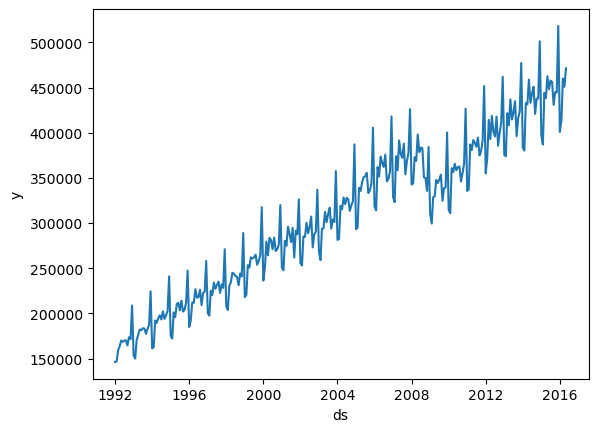

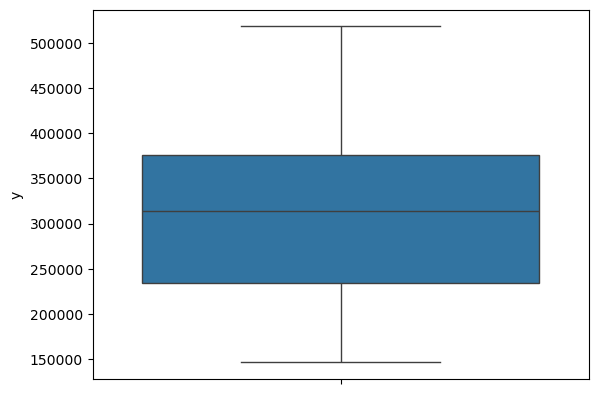

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv', sep=',')
df['ds'] = pd.to_datetime(df['ds'])
display(f'Existem ao todo {len(df)} linhas.')

display(df.describe())
# Analisando o "describe" nota-se que não existem linhas ausentes (o valor em "count" é igual ao total de linhas)

sns.lineplot(data=df, x='ds', y='y')
plt.show()

sns.boxplot(df['y'])
plt.show()

# O boxplot e o lineplot não demonstram outliers por conta de erros de digitação ou algo do gênero
# Por outro lado, o lineplot mostra uma queda em 2008 (ano da crise da bolha imobiliária nos EUA

## 2

14:18:35 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

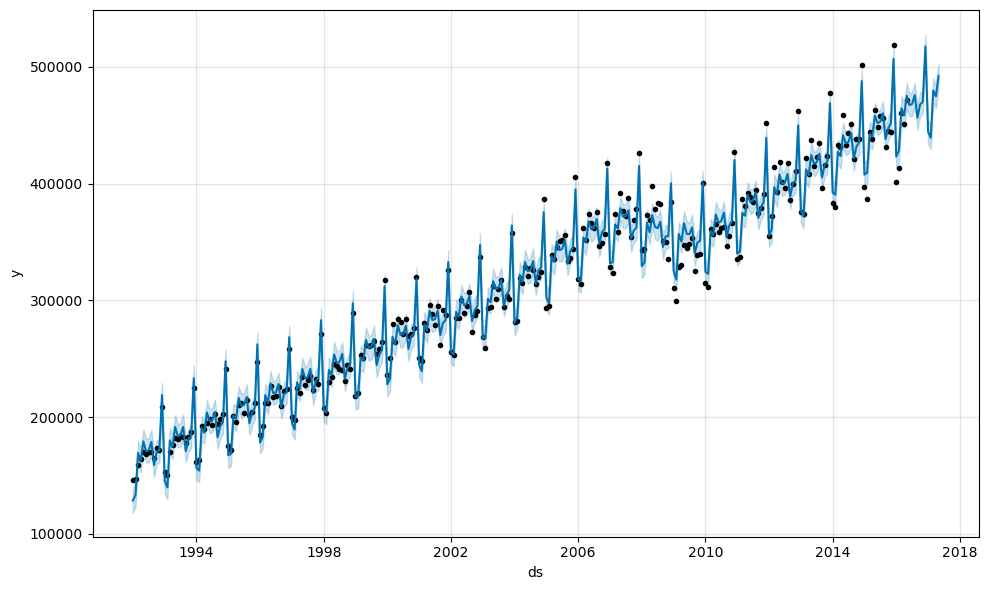

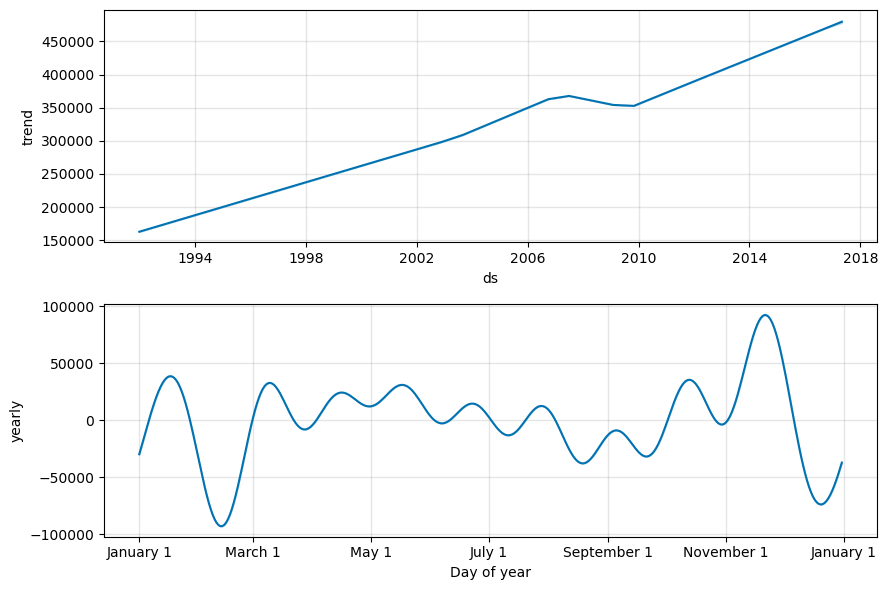

In [4]:
from prophet import Prophet

model = Prophet().fit(df)
future = model.make_future_dataframe(periods=12, freq='MS')
# o MS faz com que geremos o dia 1 de cada mês por 12 meses

forecast = model.predict(future)
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)

## 3

14:18:37 - cmdstanpy - INFO - Chain [1] start processing
14:18:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\wmont\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

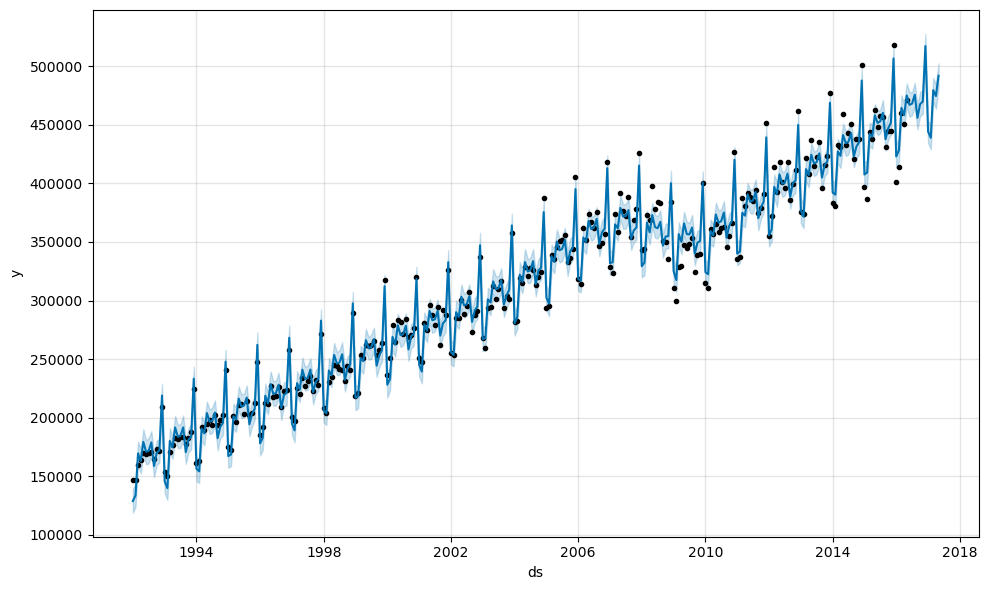

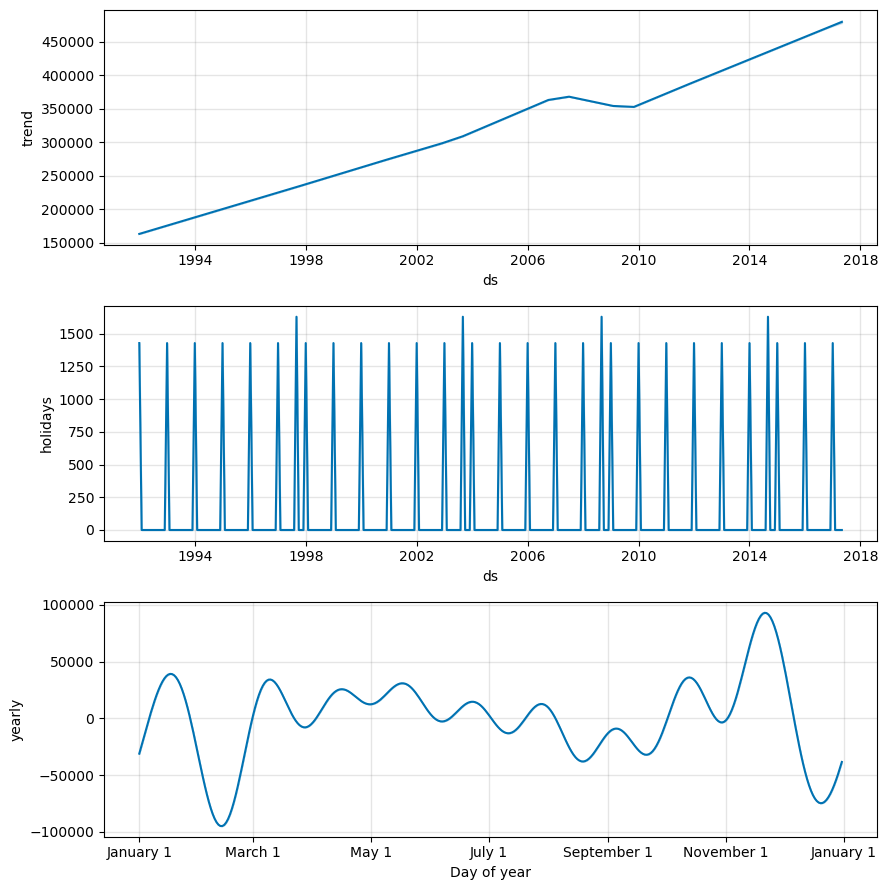

In [6]:
from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='US')
# precisamos adicionar os feriados antes de fazermos o fit

model = model.fit(df)

future = model.make_future_dataframe(periods=12, freq='MS')
# o MS faz com que geremos o dia 1 de cada mês por 12 meses

forecast = model.predict(future)
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)

## 4

In [8]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv', sep=',')
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet().fit(df)

forecast = model.predict(model.make_future_dataframe(periods=24, freq='MS'))
forecast

14:18:39 - cmdstanpy - INFO - Chain [1] start processing
14:18:40 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,162776.530011,118177.779331,138669.676058,162776.530011,162776.530011,-34216.209555,-34216.209555,-34216.209555,-34216.209555,-34216.209555,-34216.209555,0.0,0.0,0.0,128560.320456
1,1992-02-01,163829.564940,123123.746844,143646.496938,163829.564940,163829.564940,-30516.611023,-30516.611023,-30516.611023,-30516.611023,-30516.611023,-30516.611023,0.0,0.0,0.0,133312.953918
2,1992-03-01,164814.662132,159110.552825,179054.806609,164814.662132,164814.662132,4415.723066,4415.723066,4415.723066,4415.723066,4415.723066,4415.723066,0.0,0.0,0.0,169230.385198
3,1992-04-01,165867.697061,152212.895952,173167.805897,165867.697061,165867.697061,-3177.657052,-3177.657052,-3177.657052,-3177.657052,-3177.657052,-3177.657052,0.0,0.0,0.0,162690.040009
4,1992-05-01,166886.763122,167794.214737,189132.390399,166886.763122,166886.763122,12335.610725,12335.610725,12335.610725,12335.610725,12335.610725,12335.610725,0.0,0.0,0.0,179222.373846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2018-01-01,491044.143070,448662.569791,472240.673541,487048.236868,495567.364823,-31278.226960,-31278.226960,-31278.226960,-31278.226960,-31278.226960,-31278.226960,0.0,0.0,0.0,459765.916110
313,2018-02-01,492477.426827,446075.548448,469483.434615,488188.157451,497437.914256,-34487.645457,-34487.645457,-34487.645457,-34487.645457,-34487.645457,-34487.645457,0.0,0.0,0.0,457989.781370
314,2018-03-01,493772.005704,484970.570335,506476.007886,489236.903794,499197.530914,1073.374073,1073.374073,1073.374073,1073.374073,1073.374073,1073.374073,0.0,0.0,0.0,494845.379777
315,2018-04-01,495205.289461,479505.360074,502575.843860,490291.269319,501175.353594,-4132.536896,-4132.536896,-4132.536896,-4132.536896,-4132.536896,-4132.536896,0.0,0.0,0.0,491072.752564
